# **Final Project 3 (Heart Disease)**

Group 7 :

1. Ainal Fajri Malahayati (PYTN-KS12-006)
2. Raihan Daffa Aziz (PYTN-KS12-025)
3. Tsaabitah Anggraini (PYTN-KS12-023)

## **About Dataset**

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu.

## **Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as metrics
import statistics

from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<br>

## **Data Loading**

Pada proses data loading ini, kita akan mencoba membaca dataset dalam bentuk dataframe dengan menggunakan library pandas. Setelah itu akan ditampilkan baris-baris teratas dari dataframe dengan method head().

In [4]:
data = pd.read_csv("dataset/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.shape

(299, 13)

Berdasarkan hasil diatas, dataset terdiri dari 299 baris dan 13 kolom.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Selain itu dengan method info() kita dapat melihat atribut apa saja yang terdapat dalam dataset, jumlah nilai null yang terdapat pada masing-masing atribut beserta tipe datanya. Terdapat 13 atribut bertipe numerik, 3 diantaranya float64 dan 10 int64. 

In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Untuk melihat informasi statistik data, kita dapat menggunakan method describe(). Method describe ini akan menghitung informasi statistik dari atribut yang bertipe numerik.

<br>

## **Data Cleaning**

Untuk data cleaning, tidak terlalu banyak proses yang dilakukan dikarenakan data sudah bersih dan siap untuk diproses lebih lanjut. Hal ini ditunjukkan oleh output yang dihasilkan pada proses dibawah. Selain itu dilakukan pengecekan untuk nilai duplikat pada data, dan hasilnya data juga bersih dari nilai duplikat.

In [8]:
data.isnull().sum()/len(data)*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [9]:
data.isnull().sum().any()

False

In [10]:
data.duplicated().sum().any()

False

<br>

## **Data Exploration**

### **Query**

Untuk query pertama kita akan melihat jumlah pasien yang meninggal akibat penyakit gagal jantung dengan status perokok aktif.

In [11]:
query1 = data[['smoking','DEATH_EVENT']].query('smoking == 1 and DEATH_EVENT == 1')
query1

,smoking,DEATH_EVENT
2,1,1
5,1,1
7,1,1
9,1,1
10,1,1
11,1,1
22,1,1
25,1,1
27,1,1
29,1,1


Hasilnya terdapat sekitar 30 baris yang menunjukkan bahwa terdapat 30 pasien yang meninggal akibat gagal jantung dengan status perokok aktif.

In [12]:
query2 = data[['smoking','DEATH_EVENT']].query('smoking == 0 and DEATH_EVENT == 1')
query2

,smoking,DEATH_EVENT
0,0,1
1,0,1
3,0,1
4,0,1
6,0,1
...,...,...
217,0,1
220,0,1
230,0,1
246,0,1


Lalu untuk query kedua kita lakukan kondisi sebaliknya, yaitu melihat jumlah pasien yang meninggal dengan status bukan perokok. Hasil yang diperoleh menunjukkan bahwa jumlah pasien yang meninggal dengan status bukan perokok lebih banyak dibandingkan dengan yang perokok. Hal ini ditunjukkan bahwa query2 dihasilkan sekitar 66 baris yang menandakan terdapat 66 pasien yang meninggal dengan status bukan perokok. 

Berdasarkan hasil diatas, dapat diduga bahwa status perokok seorang pasien belum tentu berpengaruh pada status kematiannya. Untuk hasil yang lebih akurat, selanjutnya akan dilakukan tes korelasi menggunakan metode Point-Biserial.

### **Poit Biserial**

Korelasi Point-Biserial digunakan untuk mengukur hubungan antar 2 variabel biner (dua nilai) atau variabel biner dengan variabel numerik. Pada dataset ini kita akan mencoba menghitung hasil korelasi antara atribut smoking dengan DEATH_EVENT untuk menjawab dugaan sementara diatas. Korelasi Point-Biserial dapat dihitung menggunakan fungsi pointbiserialr() dari modul scipy.stats.

Ketika menghitung korelasi Point-Biserial antara dua variabel biner, hasilnya akan mencakup koefisien korelasi dan nilai p yang menunjukkan signifikansi statistik dari korelasi tersebut. Berikut adalah cara membaca hasil dari korelasi Point-Biserial:

a. Koefisien Korelasi:

1. Koefisien korelasi Point-Biserial berkisar antara -1 hingga 1.
2. Nilai positif menunjukkan adanya hubungan positif antara variabel biner dan variabel numerik yang dianggap sebagai variabel biner (ketika nilai variabel biner meningkat, nilai variabel numerik cenderung meningkat).
3. Nilai negatif menunjukkan adanya hubungan negatif antara variabel biner dan variabel numerik yang dianggap sebagai variabel biner (ketika nilai variabel biner meningkat, nilai variabel numerik cenderung menurun).
4. Semakin mendekati 0, semakin lemah hubungan antara kedua variabel.

b. Nilai p (p-value):

1. Nilai p digunakan untuk menguji signifikansi statistik dari korelasi yang diamati.2. 2.
2. Nilai p yang lebih rendah menunjukkan bukti yang lebih kuat untuk menolak hipotesis nol (tidak ada korelasi) dan menyimpulkan bahwa korelasi adalah signifikan.
3. Biasanya, jika nilai p kurang dari tingkat signifikansi yang ditetapkan (misalnya, 0,05), maka korelasi dianggap signifikan secara statistik.

In [13]:
# pembuktian korelasi dengan metode Point-Biserial()
korelasi, p_value = stats.pointbiserialr(data['smoking'], data['DEATH_EVENT'])
print("Korelasi:", korelasi)
print("Nilai p:", p_value)

Korelasi: -0.012623152709359618
Nilai p: 0.82792071280924


Berdasarkan keterangan dan hasil diatas, diperoleh nilai korelasi sebesar -0.012623152709359636 yang menandakan korelasi antar atribut smoking dan DEATH_EVENT bersifat negatif lemah, dikarenakan nilainya negatid dan mendekati 0. Lalu untuk nilai p dihasilkan sebesar 0.8279207128091145 yang dimana untuk niai p > 0.05 korelasi dianggap tidak signifikan secara statistik, sehingga atribut smoking dan DEATH_EVENT tidak terlalu berkaitan.

Dengan dilakukannya metode Point Biserial, maka metode ini menerima hipotesis sebelumnya dikarenakan dugaan tepat dan sesuai, yaitu "status perokok seorang pasien belum tentu berpengaruh pada status kematiannya".

### **Grouping**

Pada proses grouping dilakukan penggabungan antara atribut age, death, dan jumlah dari kadar serum creatinine setiap pasien.
Untuk atribut age, digunakan range usia dari 40 hingga 50 tahun. 

In [14]:
group = data[(data['age'] <= 50 )].groupby(['age','DEATH_EVENT'])['creatinine_phosphokinase'].sum()
group

age   DEATH_EVENT
40.0  0               2248
41.0  0                148
42.0  0               6107
      1                250
43.0  0                358
44.0  0                666
45.0  0              10670
      1              12871
46.0  0               1010
      1                168
47.0  0                582
48.0  1                713
49.0  0               1121
      1                789
50.0  0              10887
      1               4468
Name: creatinine_phosphokinase, dtype: int64

Kadar serum creatinine tertinggi diperoleh pasien umur 45 tahun yang meninggal, yaitu sebesar 12871. 

### **Central Tendency**

In [15]:
# 1. Mencari mean
# Menemukan rata-rata dari atribut age
mean = data['creatinine_phosphokinase'].mean()
print(mean)

# 2. Mencari mode
# Menemukan modus untuk mengetahui apakah jumlah perokok aktif lebih banyak daripada perokok pasif atau sebaliknya
mode = data['smoking'].mode()
print(mode)

# 3. Mencari median untuk atribut creatinine phosphokinase
median = statistics.median(data['creatinine_phosphokinase'])
print(median)

581.8394648829432
0    0
Name: smoking, dtype: int64
250


Untuk central tendency kita akan mencoba menghitung rata-rata dari creatinine_phosphokinase, modus dari smoking dan median dari creatinine_phosphokinase. Rata-rata dari creatinine_phosphokinase yang dihasilkan yaitu sebesar 581.8394648829432, dan modus untuk smoking ialah 0, yang berarti pasien yang bukan perokok lebih banyak dibandingkan yang perokok. Lalu median untuk creatinine_phosphokinase sebesar 250. 

### **Variability**

In [16]:
# 1. Variance
var = np.var(data['age'], ddof=1)
print("Variance of age: ", var)
# 2. Standard Deviation
std = np.std(data['age'], ddof=1)
print("Standard Deviation of age: ", std)
# 3. Skewness
z = data['age']
z.skew()
print("Skewness: ", z.skew())
# 4. Percentiles
percentile = np.percentile(z, [25, 50, 75])
print("Percentile: ", percentile)
# 5. Ranges
range = np.ptp(z)
print("Range: ", range)

Variance of age:  141.48648290797067
Standard Deviation of age:  11.89480907404447
Skewness:  0.42306190672863536
Percentile:  [51. 60. 70.]
Range:  55.0


Sedangkan untuk central tendency, kita akan menghitung varians, standar deviasi, skewness, percentiles dan ranges untuk atribut Rainfall.

<br>

## **Data Visualization**

Untuk visualisasi data, kita akan mencoba membuat barchart untuk menampilkan proporsi pasien yang hidup dan meninggal.
Hasil dibawah diperoleh bahwa jumlah pasien yang masih hidup lebih banyak dibandingkan pasien yang meninggal.

Text(0.5, 1.0, 'Number of death event from heart disease patient')

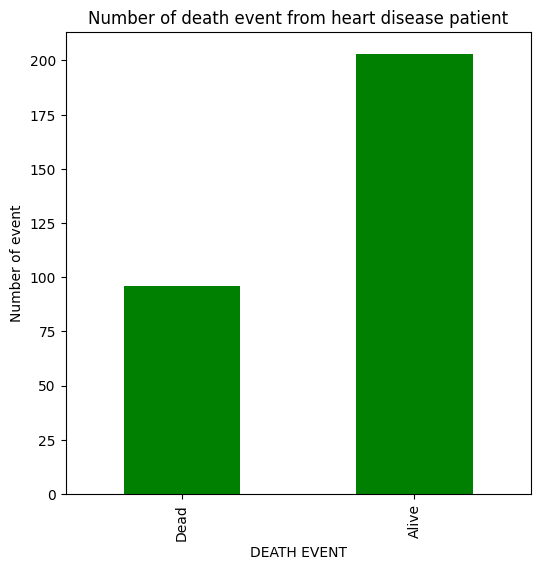

In [17]:
class_plot = pd.Series({'Dead': len(data[data['DEATH_EVENT']==1]), 'Alive': len(data[data['DEATH_EVENT']==0])})
class_plot.plot(kind='bar', figsize=(6,6), color='green')

plt.xlabel('DEATH EVENT')
plt.ylabel('Number of event')
plt.title('Number of death event from heart disease patient')

Visualisasi di bawah akan menampilkan barchart untuk atribut age yang telah dikelompokkan berdasarkan range usia. 
- Range 1: 40-55
- Range 2: 56-70
- Range 3: 71-85
- Range 4: 86-100
    
Dan hasilnya diperoleh bahwa pasien terbanyak yang terdata dalam dataset adalah pasien dengan range usia 56-70.

0      71-85
1      40-55
2      56-70
3      40-55
4      56-70
       ...  
294    56-70
295    40-55
296    40-55
297    40-55
298    40-55
Name: age, Length: 299, dtype: category
Categories (4, object): ['40-55' < '56-70' < '71-85' < '86-100']

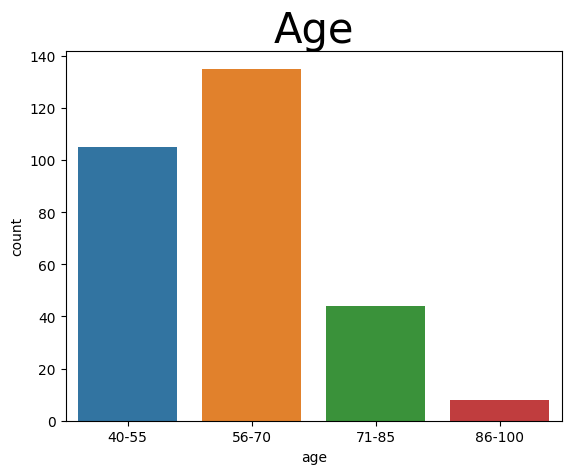

In [18]:
age_vis = pd.cut(x=data['age'], bins=[40,55,70,85,100], labels = ['40-55','56-70','71-85','86-100'])
plt.title('Age', fontsize=30)
sns.countplot(x=age_vis)
age_vis

Untuk visualisasi selanjutnya akan digunakan barchart untuk menampilkan visualisasi antar setiap atribut yang terdapat dalam dataste terhadap atribut kelasnya yaitu DEATH_EVENT.

([<matplotlib.axis.XTick at 0x187dc99f3d0>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

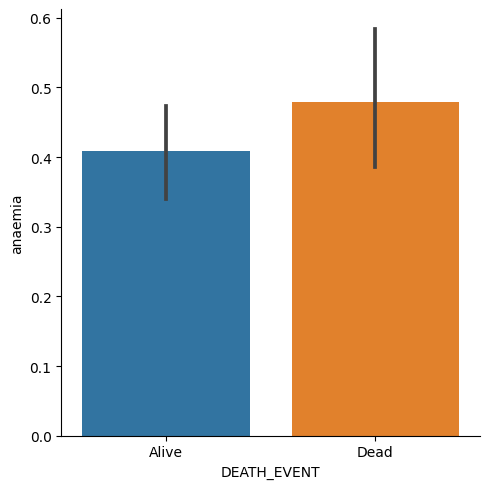

In [19]:
data[['anaemia', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='anaemia', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

([<matplotlib.axis.XTick at 0x187dfec3050>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

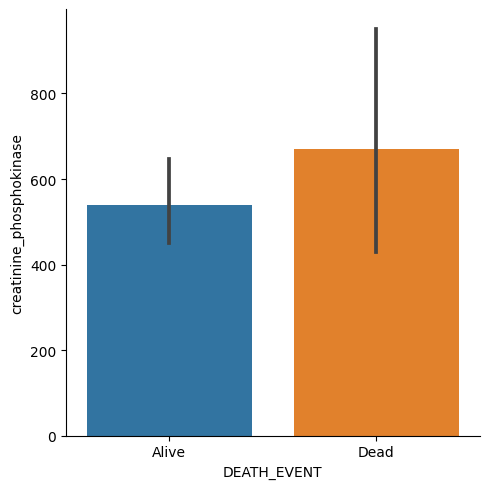

In [20]:
data[['creatinine_phosphokinase', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='creatinine_phosphokinase', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

([<matplotlib.axis.XTick at 0x187dff7c790>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

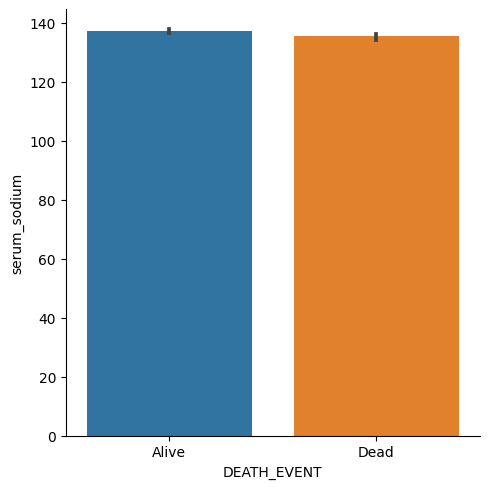

In [21]:
data[['serum_sodium', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='serum_sodium', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

([<matplotlib.axis.XTick at 0x187dfd9fe10>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

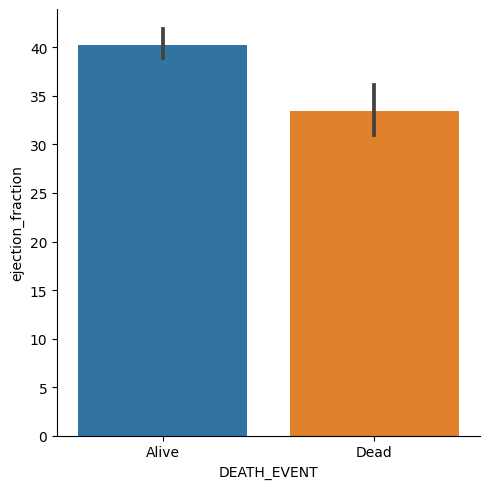

In [22]:
data[['ejection_fraction', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='ejection_fraction', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

([<matplotlib.axis.XTick at 0x187e10a6dd0>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

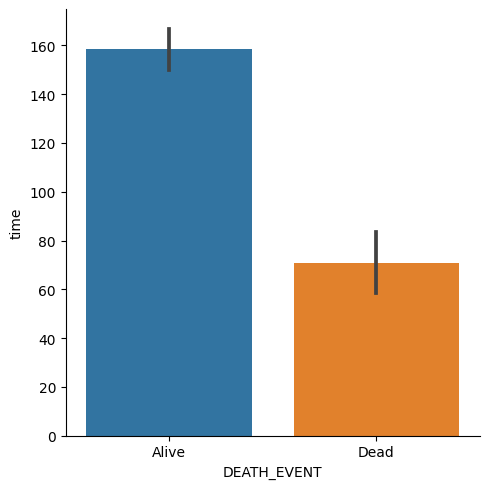

In [23]:
data[['time', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='time', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

([<matplotlib.axis.XTick at 0x187e1113850>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

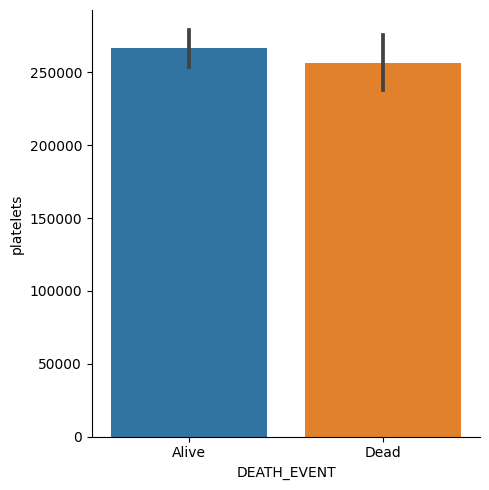

In [24]:
data[['platelets', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='platelets', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

([<matplotlib.axis.XTick at 0x187e1183e10>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

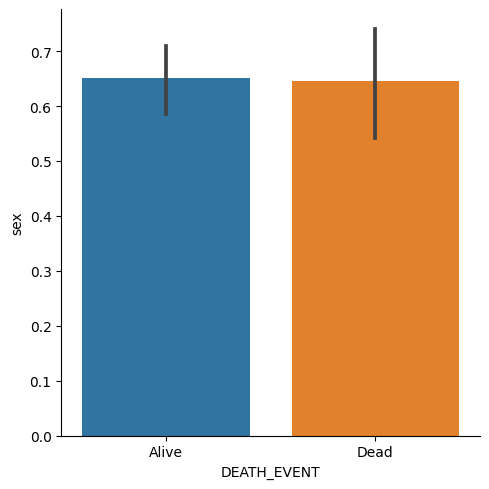

In [25]:
data[['sex', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='sex', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

Pada visualisasi dibawah akan dilakukan barchart untuk melihat proporsi pasien berdasarkan gendernya. Hasil menunjukkan jumlah pasien pria lebih banyak dibandingkan pasien laki-laki. 

Text(0, 0.5, 'Number of patients')

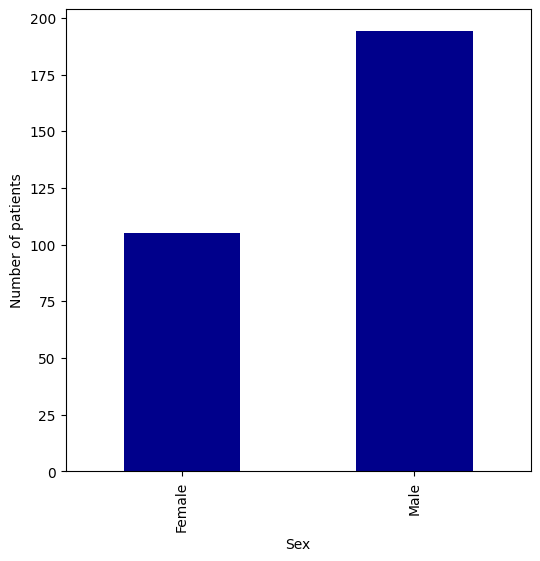

In [26]:
class_plot2 = pd.Series({'Female': len(data[data['sex']==0]), 'Male': len(data[data['sex']==1])})
class_plot2.plot(kind='bar', figsize=(6,6), color='darkblue')

plt.xlabel('Sex')
plt.ylabel('Number of patients')

Lalu selanjutnya akan dilihat proporsi antara atribut gender dengan status DEATH EVENT. Hasil menunjukkan bahwa jumlah pasien pria yang meninggal lebih banyak dibandingkan pasien wanita. Begitu juga untuk pasien yang masih hidup, jumlah pasien pria juga leibih banyak dibandingkan wanita.

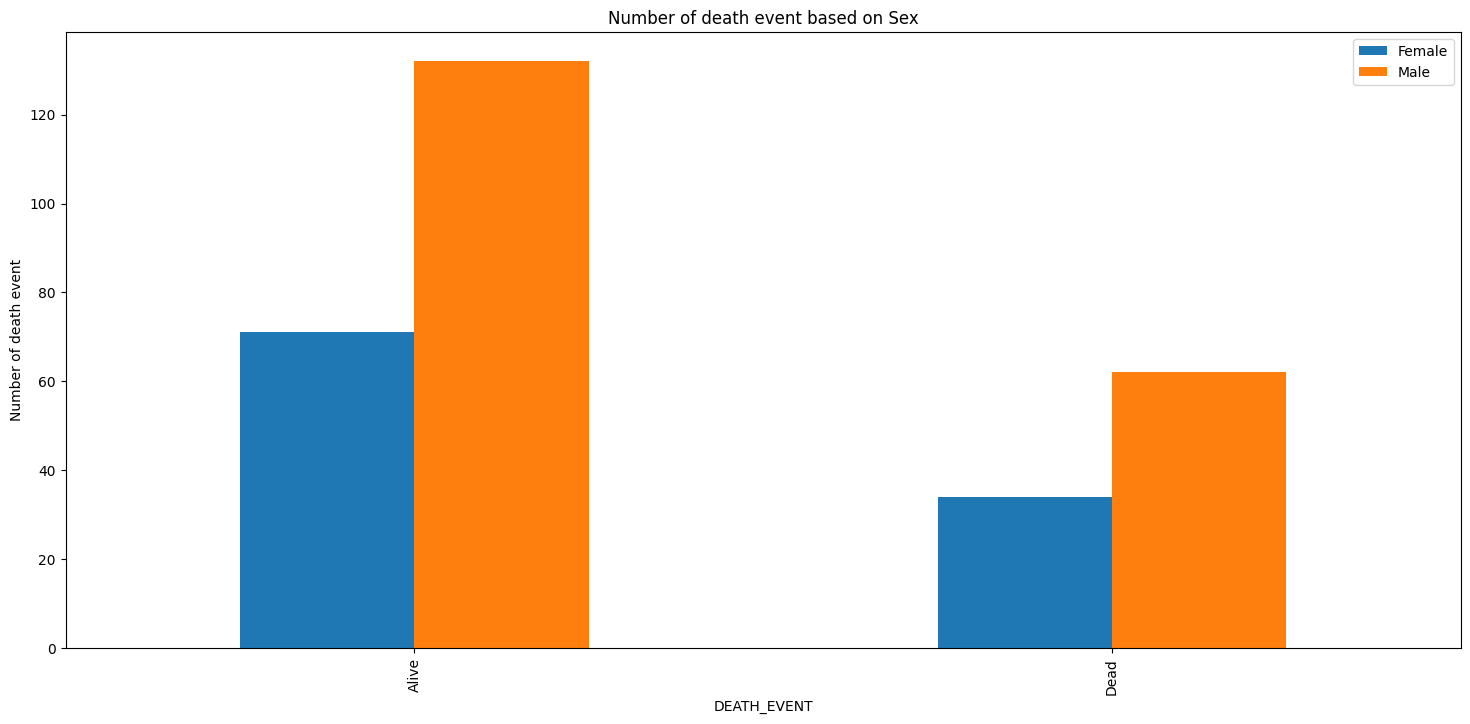

In [27]:
# distribusi data berdasarkan sex
sex_counts = data.groupby(['DEATH_EVENT', 'sex']).size().unstack()
sex_counts.plot(kind='bar', stacked=False, figsize=(18,8))
plt.xlabel('DEATH_EVENT')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])
plt.ylabel('Number of death event')
plt.title('Number of death event based on Sex')
plt.legend(['Female', 'Male'])
plt.show()

([<matplotlib.axis.XTick at 0x187e12bdcd0>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

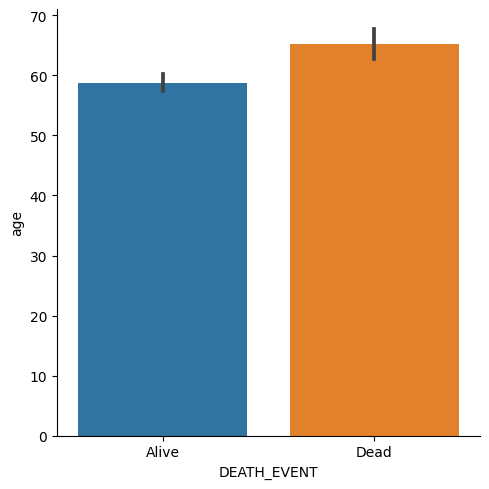

In [28]:
data[['age', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='age', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

Visualisasi di bawah akan menampilkan distribusi data berdasarkan age dan DEATH_EVENT. Jumlah angka kematiannnya terbesar diperoleh pada pasien yang berusia 60 tahun.

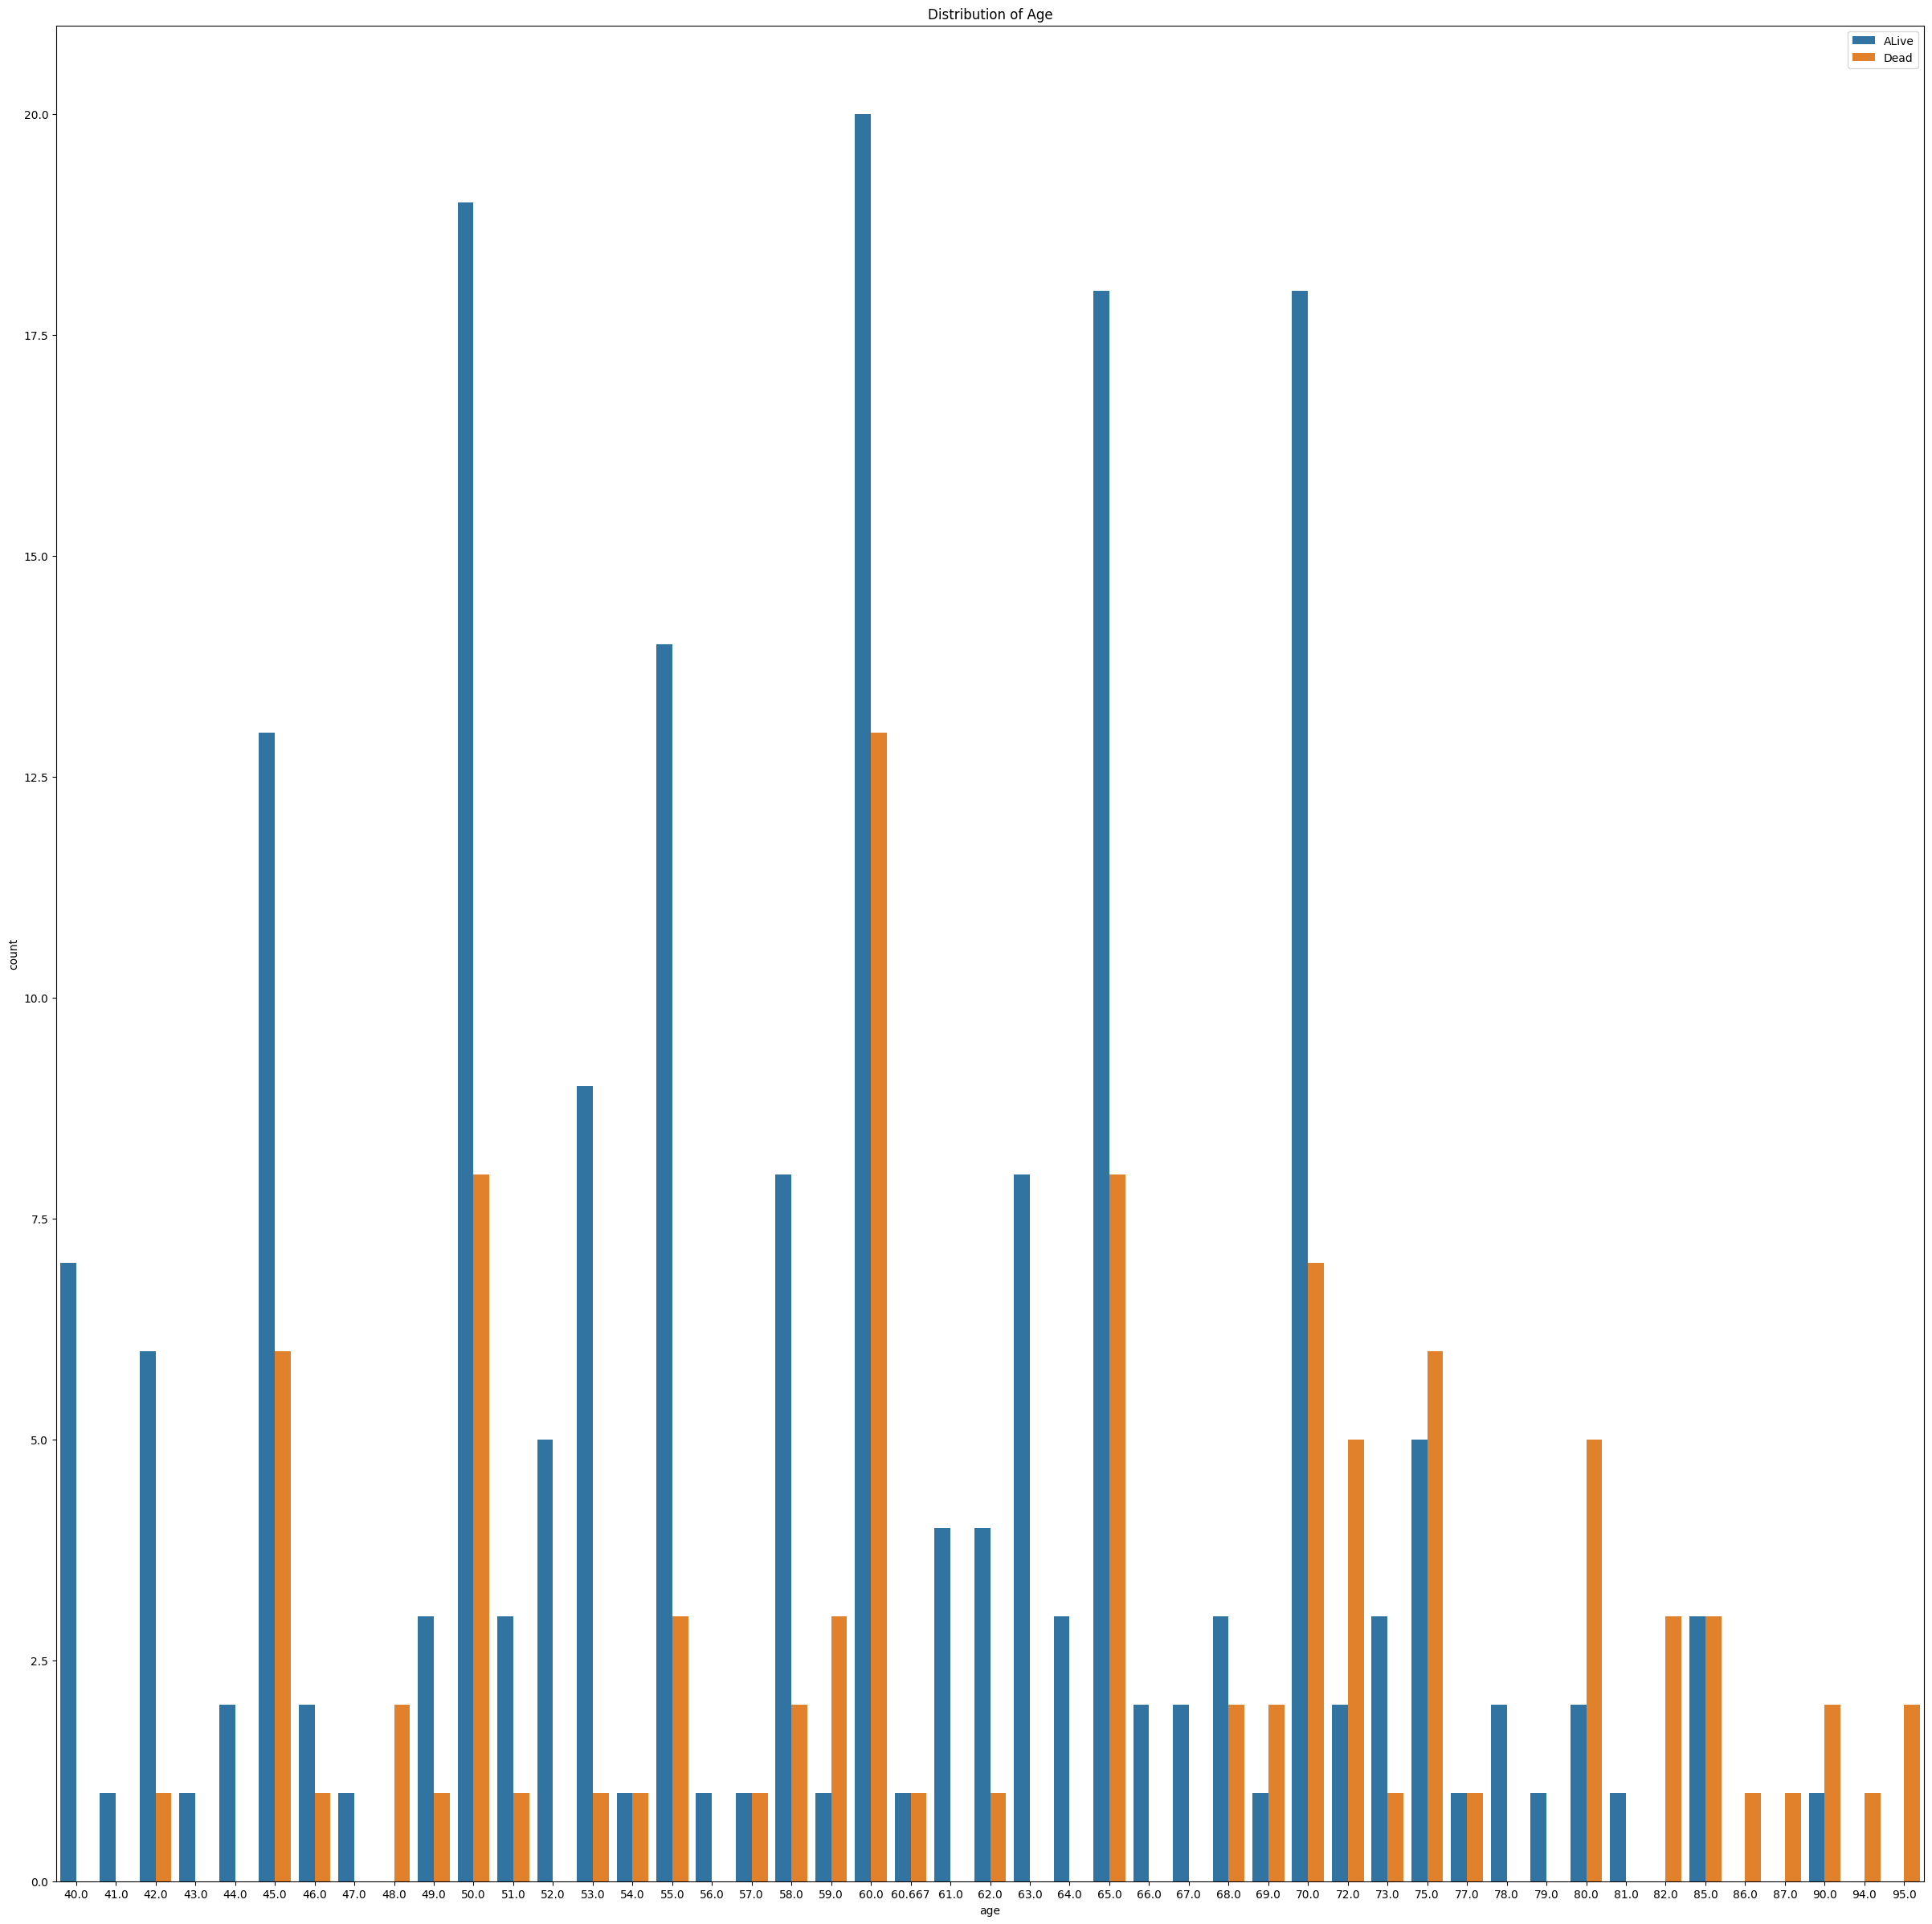

In [29]:
# distribusi data berdasarkan usia
plt.figure(figsize=(30,30))
sx = sns.countplot(data=data, x=data['age'], hue='DEATH_EVENT')
sx.set_title('Distribution of Age')
sx.legend(labels = ['ALive', 'Dead']) 

([<matplotlib.axis.XTick at 0x187e38bb510>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

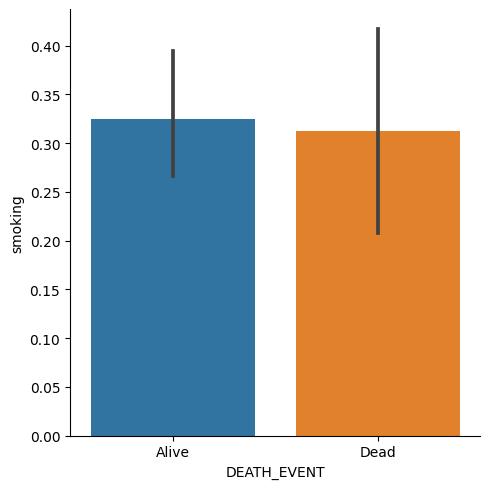

In [30]:
data[['smoking', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='smoking', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

Lalu selanjutnya akan dilihat proporsi antara atribut smoking dengan status DEATH EVENT. Hasil menunjukkan bahwa jumlah pasien yang berstatus bukan perokok lebih banyak dibandingkan pasien dengan status perokok. 

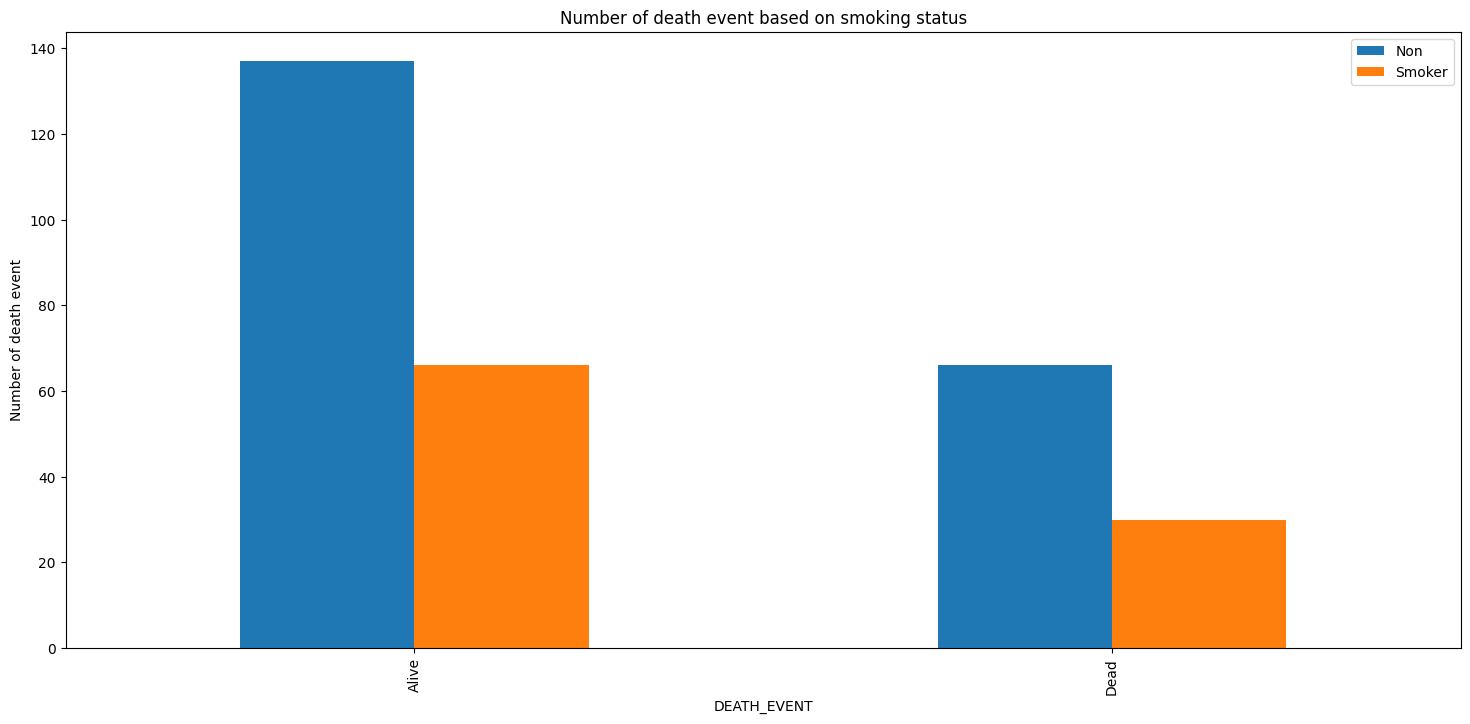

In [31]:
# distribusi data berdasarkan smoking
smoking_counts = data.groupby(['DEATH_EVENT', 'smoking']).size().unstack()
smoking_counts.plot(kind='bar', stacked=False, figsize=(18,8))
plt.xlabel('DEATH_EVENT')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])
plt.ylabel('Number of death event')
plt.title('Number of death event based on smoking status')
plt.legend(['Non', 'Smoker'])
plt.show()

([<matplotlib.axis.XTick at 0x187e1bdb750>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

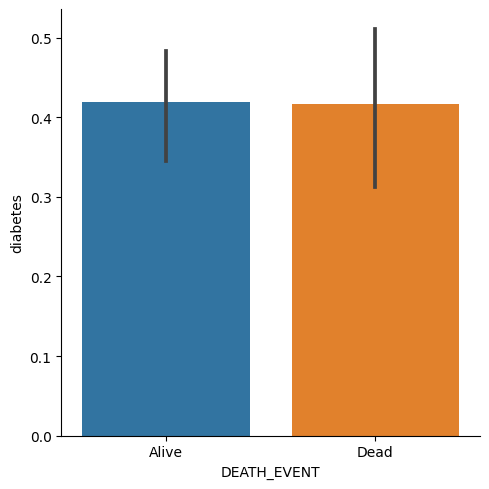

In [32]:
data[['diabetes', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='diabetes', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

Lalu selanjutnya akan dilihat proporsi antara atribut diabetes dengan status DEATH EVENT. Hasil menunjukkan bahwa jumlah pasien diabetes yang meninggal lebih sedikit dibandingkan dengan pasien yang tidak terjangkit diabetes. Begitu juga untuk pasien yang masih hidup, jumlah pasien diabetes lebih sedikit dibandingkan yang tidak terjangkit diabetes.

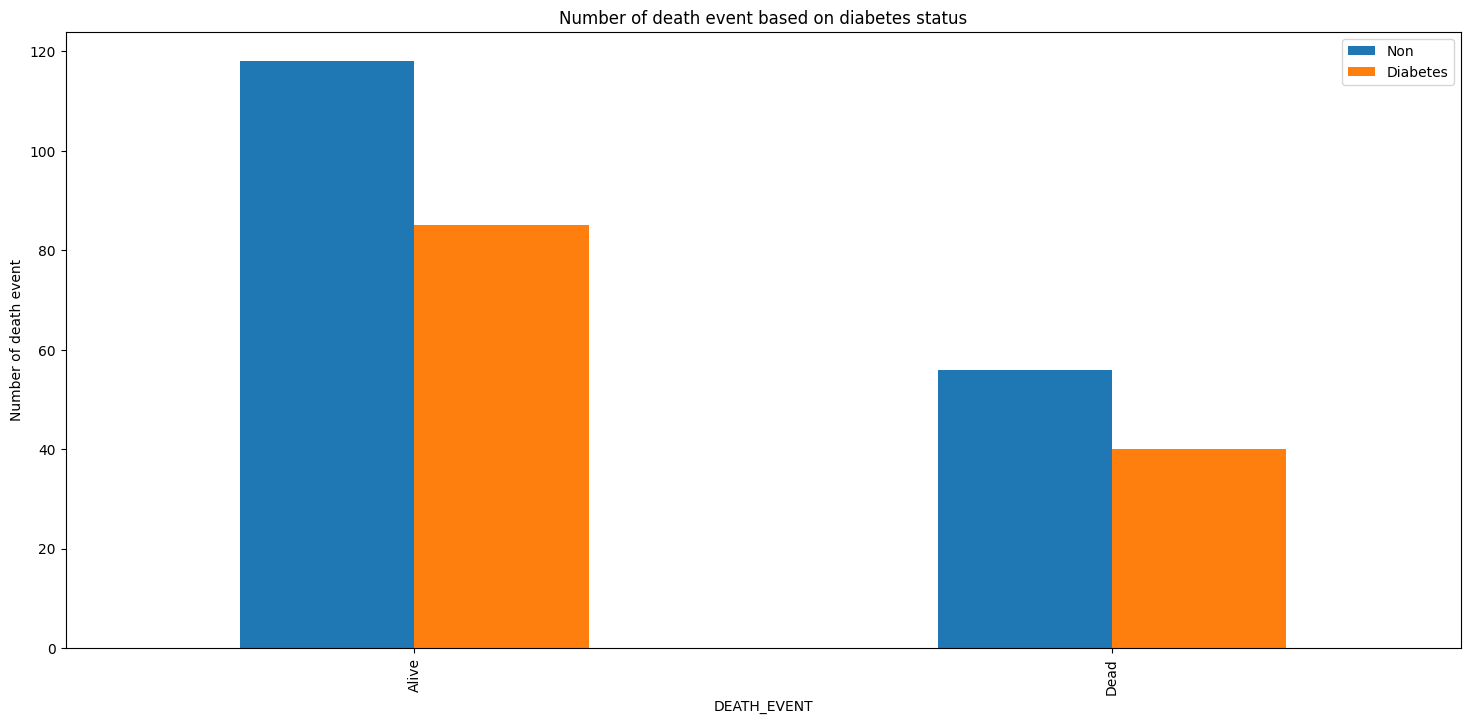

In [33]:
# distribusi data berdasarkan diabetes
diab_counts = data.groupby(['DEATH_EVENT', 'diabetes']).size().unstack()
diab_counts.plot(kind='bar', stacked=False, figsize=(18,8))
plt.xlabel('DEATH_EVENT')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])
plt.ylabel('Number of death event')
plt.title('Number of death event based on diabetes status')
plt.legend(['Non', 'Diabetes'])
plt.show()

([<matplotlib.axis.XTick at 0x187e1c52a10>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

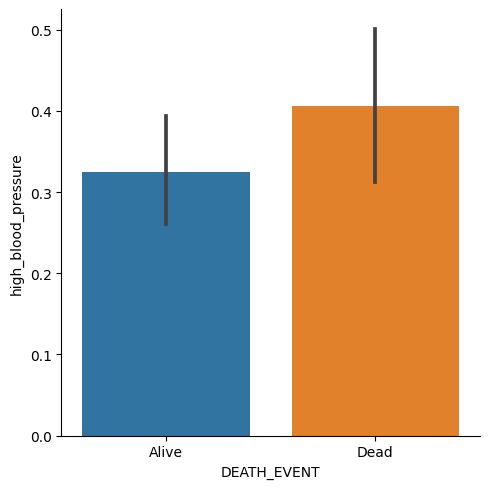

In [34]:
data[['high_blood_pressure', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='high_blood_pressure', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

Selanjutnya akan dilihat proporsi antara atribut high_blood_pressure dengan status DEATH EVENT. Hasil menunjukkan bahwa jumlah pasien hipertensi yang meninggal lebih sedikit dibandingkan dengan pasien yang tidak hipertensi. Begitu juga untuk pasien yang masih hidup, jumlah pasien hipertensi lebih sedikit dibandingkan yang tidak hipertensi.

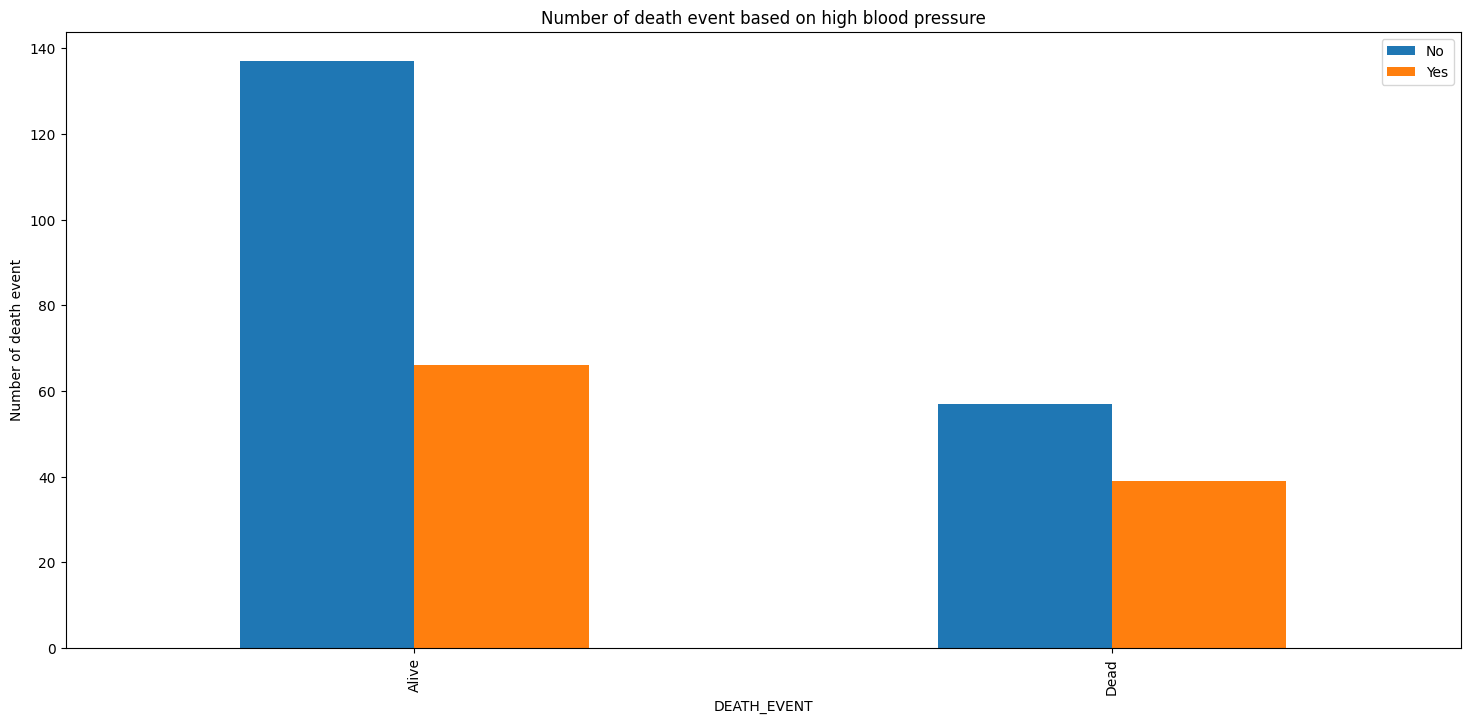

In [35]:
# distribusi data berdasarkan high blood pressure
hbp_counts = data.groupby(['DEATH_EVENT', 'high_blood_pressure']).size().unstack()
hbp_counts.plot(kind='bar', stacked=False, figsize=(18,8))
plt.xlabel('DEATH_EVENT')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])
plt.ylabel('Number of death event')
plt.title('Number of death event based on high blood pressure')
plt.legend(['No', 'Yes'])
plt.show()

([<matplotlib.axis.XTick at 0x187e1130cd0>,
 [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

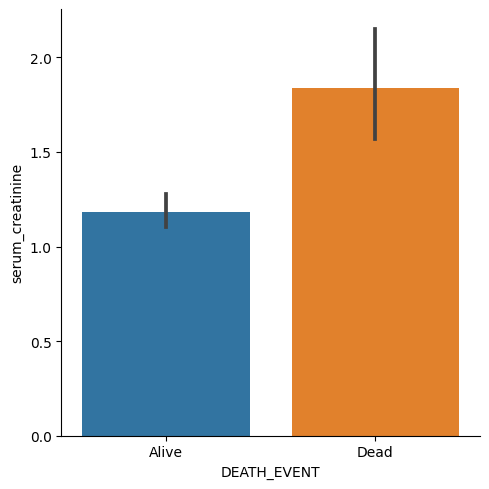

In [36]:
data[['serum_creatinine', 'DEATH_EVENT']]
sns.catplot(data=data, x='DEATH_EVENT', y='serum_creatinine', kind='bar')
plt.xticks(ticks=(0,1),labels=['Alive','Dead'])

Untuk atribut serum creatinine akan dilihat proporsinya dengan status DEATH EVENT menggunakan displot. Dikarenakan distribusi nilai dari serum creatinine yang cukup besar, maka digunakan displot agar distribusi tiap-tiap nilai seimbang. Hasil menunjukkan bahwa kasus kematian tertinggi diperoleh pada saat kadar serum creatinine = 1. Selain itu, semakin besar kadar serum_creatinine, maka semakin banyak jumlah pasien yang meninggal dibandingkan yang hidup. 

<Figure size 3000x3000 with 0 Axes>

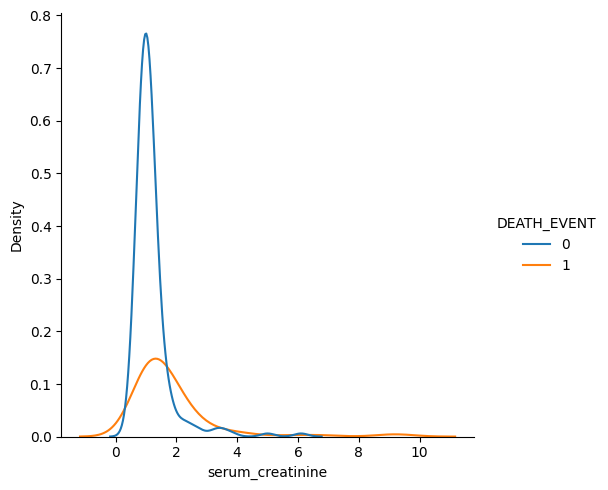

In [37]:
# distribusi data berdasarkan serum creatinine menggunakan distplot
plt.figure(figsize=(30,30))
sx = sns.displot(data=data, x=data['serum_creatinine'], hue="DEATH_EVENT", kind="kde")

<br>

## **Data Preprocessing**

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


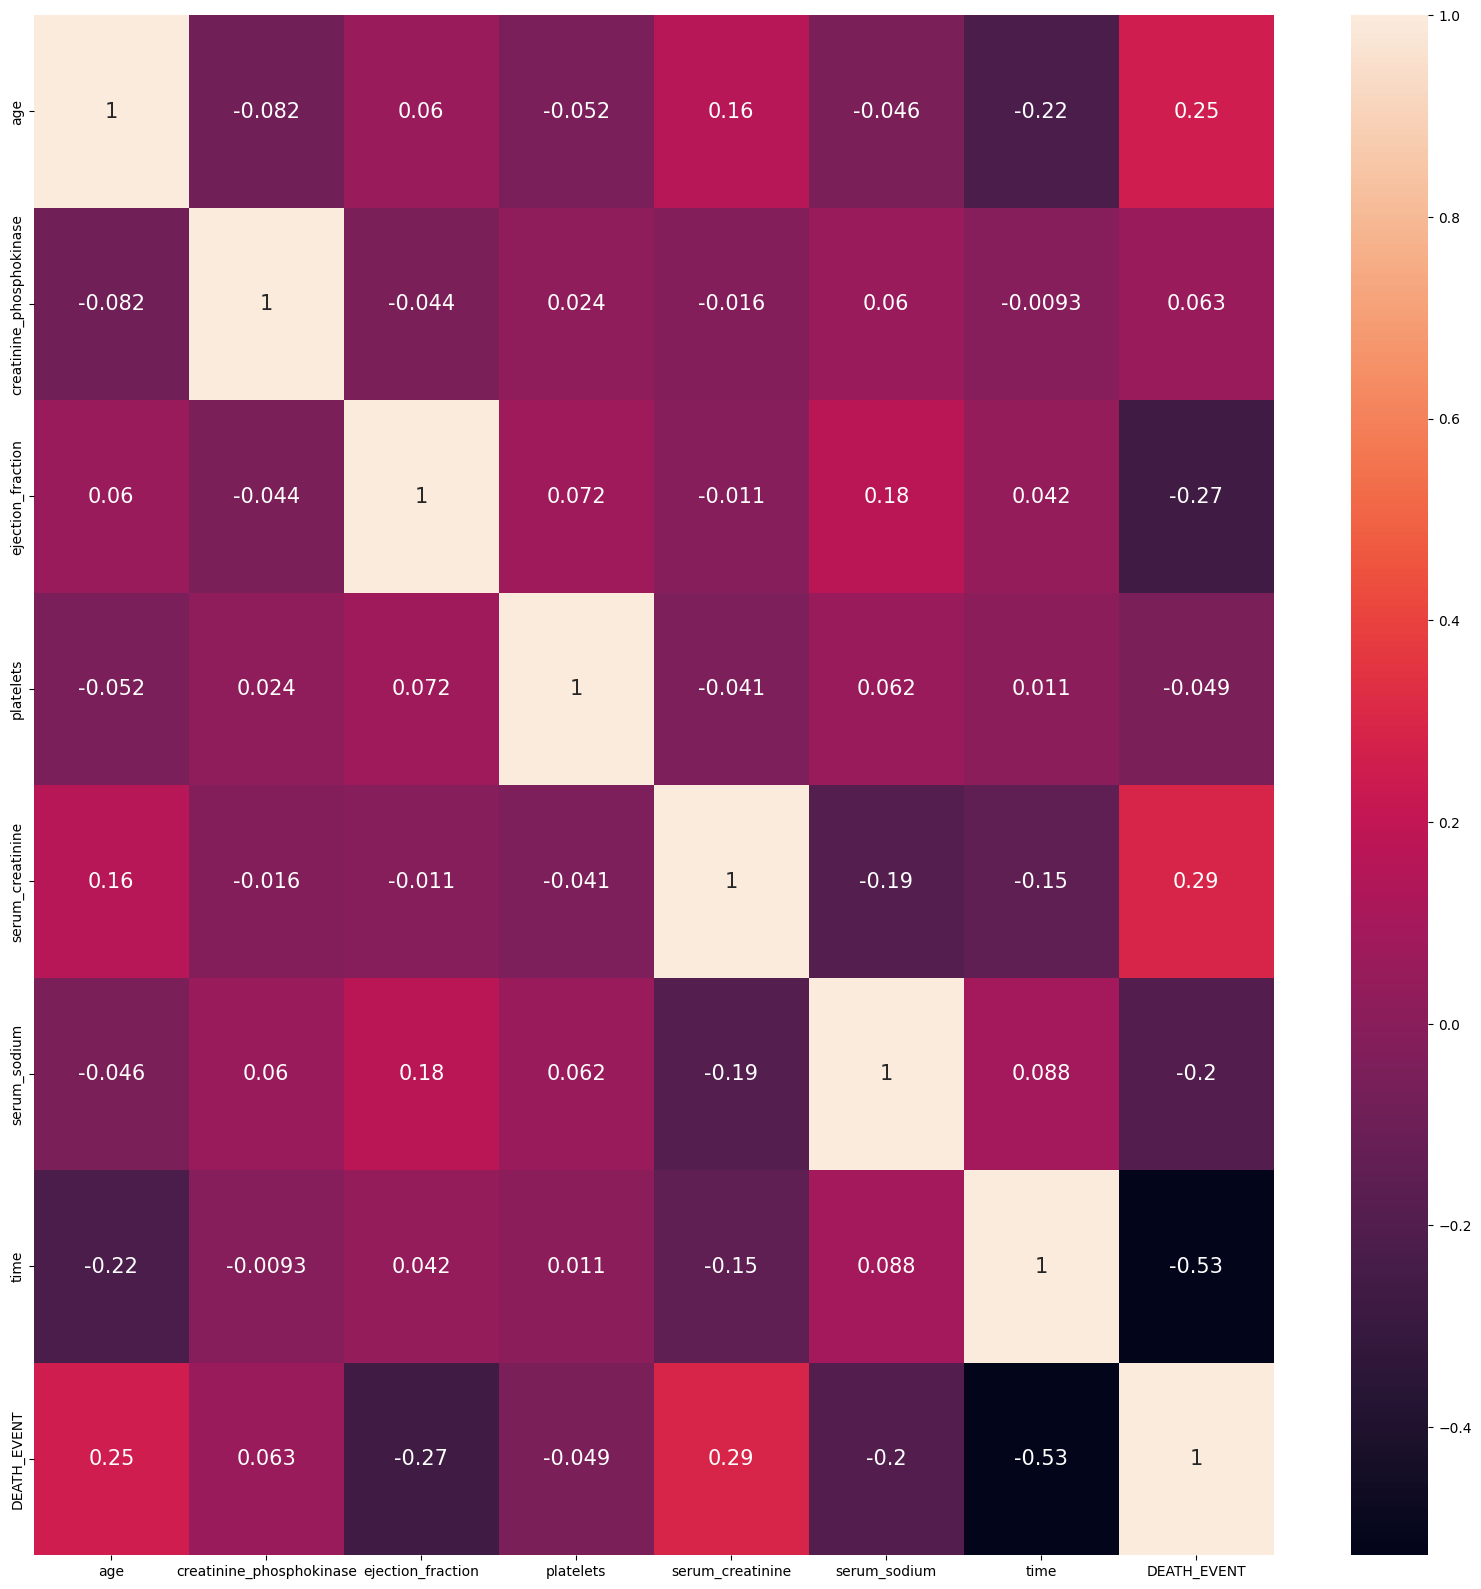

In [39]:
# cek korelasi terhadap label dengan corr map 

data_num = data.drop(["anaemia","diabetes","high_blood_pressure","sex","smoking"], axis=1)
col_corr=data_num.corr()
plt.figure(figsize = (20,20))
sns.heatmap(col_corr,annot=True, annot_kws={'fontsize':15})
plt.show()

Untuk corr map kita akan melihat korelasi atribut yang bersifat numerik (bukan biner) terhadap atribut class yaitu DEATH EVENT. Korelasi terendah diperoleh platelets yaitu sebesar -0.049.

Platelet atau trombosit adalah sel darah kecil yang berperan dalam proses pembekuan darah. Mereka berperan penting dalam menghentikan pendarahan saat terjadi kerusakan pada pembuluh darah. Meskipun platelet sendiri tidak secara langsung terkait dengan penyakit jantung, ada hubungan antara tingkat platelet dalam darah dan risiko penyakit jantung tertentu.

In [40]:
X = data.drop('platelets', axis=1)
y = data['DEATH_EVENT']

In [41]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,1.4,140,1,1,280,0


In [42]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

<br>

## **Data Modelling**

### **Split data**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (149, 12)
X_test shape is  (150, 12)
y_train shape is  (149,)
y_test shape is  (150,)


### **Normalisasi data**

In [44]:
# Melakukan normalisasi dengan SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### **Ensemble Model**
### **Voting, Boosting, Bagging, Stacking**

Ensemble model adalah sebuah metode dalam machine learning yang menggabungkan beberapa model prediktif untuk meningkatkan kinerja dan akurasi prediksi. Ide di balik ensemble model adalah menggabungkan kekuatan beberapa model yang berbeda dan memanfaatkan keunggulan masing-masing model tersebut.

Ensemble model dapat digunakan dalam berbagai jenis algoritma machine learning, seperti decision tree, neural network, dan k-nearest neighbors. Ada beberapa pendekatan yang umum digunakan dalam ensemble model, di antaranya:

1. Voting: Model-model individu menghasilkan prediksi mereka sendiri, dan hasil prediksi diambil berdasarkan mayoritas suara atau bobot tertentu. Terdapat dua jenis voting, yaitu:
- Hard Voting: Keputusan diambil berdasarkan mayoritas suara. Prediksi yang paling banyak dipilih menjadi hasil akhir.
- Soft Voting: Prediksi dari setiap model diberi bobot, dan hasil akhir diambil berdasarkan perhitungan bobot tersebut.

2.  Bagging: Model-model individu dilatih secara independen pada subset acak dari data pelatihan dengan pengambilan sampel dengan pengembalian (bootstrap). Prediksi akhir dihasilkan dengan menggabungkan hasil prediksi dari setiap model menggunakan teknik voting.

3. Boosting: Model-model individu dilatih secara berurutan, di mana setiap model berusaha memperbaiki kesalahan prediksi model sebelumnya. Model-model ini biasanya memiliki bobot yang diberikan berdasarkan kinerja mereka, dan prediksi akhir dihasilkan dengan menggabungkan hasil prediksi dari setiap model menggunakan teknik weighted voting.

4. Stacking: Model-model individu dilatih secara independen, dan prediksi dari setiap model menjadi fitur input bagi model agregasi (meta-model) yang kemudian menghasilkan prediksi akhir.

Ensemble model sering kali memberikan kinerja yang lebih baik daripada model individu, karena kombinasi model-model tersebut dapat mengurangi bias, varian, dan meningkatkan generalisasi. Dengan menggabungkan berbagai sudut pandang dari model-model yang berbeda, ensemble model dapat menghasilkan prediksi yang lebih akurat dan stabil.


Terdapat 4 algoritma yang digunakan, yaitu Logsitic Regression, Decision Tree, Extra Tree, dan Gradient Boosting yang kemudian keempat algoritma ini akan dilakukan proses ensemble.

In [45]:
# Membuat model ensemble menggunakan RandomForestClassifier, GaussianNB, ExtraTreesClassifier, dan GradientBoostingClassifier
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_et = ExtraTreesClassifier(random_state=42)
model_gb = GradientBoostingClassifier(random_state=42)

# Melatih model-model individu
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_et.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=42)

In [46]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# Membuat ensemble model menggunakan VotingClassifier
estimators = [('lr', model_lr), ('dt', model_dt), ('et', model_et), ('gb', model_gb)]
ensemble_model_voting = VotingClassifier(estimators=estimators, voting='hard')
ensemble_model_bagging = BaggingClassifier(base_estimator=VotingClassifier(estimators=[('lr', model_lr), ('dt', model_dt), ('et', model_et), ('gb', model_gb)], voting='hard'), n_estimators=10, random_state=42)
ensemble_model_stacking = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42))
ensemble_model_boost = AdaBoostClassifier(base_estimator=model_gb, n_estimators=10, random_state=42)

# Melatih ensemble model
ensemble_model_voting.fit(X_train, y_train)
ensemble_model_bagging.fit(X_train, y_train)
ensemble_model_stacking.fit(X_train, y_train)
ensemble_model_boost.fit(X_train, y_train)


# Memprediksi data uji menggunakan ensemble model
ensemble_predictions_voting = ensemble_model_voting.predict(X_test)
ensemble_predictions_bagging = ensemble_model_bagging.predict(X_test)
ensemble_predictions_stacking = ensemble_model_stacking.predict(X_test)
ensemble_predictions_boost = ensemble_model_boost.predict(X_test)


# Melatih model-model individu
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_et.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

# Melatih model ensemble
ensemble_model_voting.fit(X_train, y_train)
ensemble_model_bagging.fit(X_train, y_train)
ensemble_model_stacking.fit(X_train, y_train)
ensemble_model_boost.fit(X_train, y_train)

# Memprediksi data uji menggunakan model-model individu
lr_predictions = model_lr.predict(X_test)
dt_predictions = model_dt.predict(X_test)
et_predictions = model_et.predict(X_test)
gb_predictions = model_gb.predict(X_test)

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [48]:
# Evaluasi performa model-model individu
print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))
print("\nDecision Tree Classifier:")
print(classification_report(y_test, dt_predictions))
print("\nExtra Trees Classifier:")
print(classification_report(y_test, et_predictions))
print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gb_predictions))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        42

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Extra Trees Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
w

In [49]:
# Evaluasi performa ensemble model
print("Ensemble Model(Voting):")
print(classification_report(y_test, ensemble_predictions_voting))
print("===========================================================")
print("Ensemble Model(Bagging):")
print(classification_report(y_test, ensemble_predictions_bagging))
print("===========================================================")
print("Ensemble Model(Stacking):")
print(classification_report(y_test, ensemble_predictions_stacking))
print("===========================================================")
print("Ensemble Model(Bosst):")
print(classification_report(y_test, ensemble_predictions_boost))

Ensemble Model(Voting):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Ensemble Model(Bagging):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Ensemble Model(Stacking):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150

### **Hyperparameter Tuning**

In [50]:
# Membuat ensemble model menggunakan VotingClassifier, bagging, stacking, dan boosting
estimators = [('lr', model_lr), ('dt', model_dt), ('et', model_et), ('gb', model_gb)]
ensemble_model_voting = VotingClassifier(estimators=estimators, voting='soft')
ensemble_model_bagging = BaggingClassifier(base_estimator=VotingClassifier(estimators=[('lr', model_lr), ('dt', model_dt), ('et', model_et), ('gb', model_gb)], voting='soft'), n_estimators=10, random_state=42)
ensemble_model_stacking = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42))
ensemble_model_boost = AdaBoostClassifier(base_estimator=model_gb, n_estimators=10, random_state=42)

# Melatih ensemble model
ensemble_model_voting.fit(X_train, y_train)
ensemble_model_bagging.fit(X_train, y_train)
ensemble_model_stacking.fit(X_train, y_train)
ensemble_model_boost.fit(X_train, y_train)


# Memprediksi data uji menggunakan ensemble model
ensemble_predictions_voting = ensemble_model_voting.predict(X_test)
ensemble_predictions_bagging = ensemble_model_bagging.predict(X_test)
ensemble_predictions_stacking = ensemble_model_stacking.predict(X_test)
ensemble_predictions_boost = ensemble_model_boost.predict(X_test)


# Melatih model-model individu
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_et.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

# Melatih model ensemble
ensemble_model_voting.fit(X_train, y_train)
ensemble_model_bagging.fit(X_train, y_train)
ensemble_model_stacking.fit(X_train, y_train)
ensemble_model_boost.fit(X_train, y_train)

# Memprediksi data uji menggunakan model-model individu
lr_predictions = model_lr.predict(X_test)
dt_predictions = model_dt.predict(X_test)
et_predictions = model_et.predict(X_test)
gb_predictions = model_gb.predict(X_test)

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [51]:
# Evaluasi performa model-model individu
print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))
print("\nDecision Tree Classifier:")
print(classification_report(y_test, dt_predictions))
print("\nExtra Trees Classifier:")
print(classification_report(y_test, et_predictions))
print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gb_predictions))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        42

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Extra Trees Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
w

In [52]:
# Evaluasi performa ensemble model
print("Ensemble Model(Voting):")
print(classification_report(y_test, ensemble_predictions_voting))
print("===========================================================")
print("Ensemble Model(Bagging):")
print(classification_report(y_test, ensemble_predictions_bagging))
print("===========================================================")
print("Ensemble Model(Stacking):")
print(classification_report(y_test, ensemble_predictions_stacking))
print("===========================================================")
print("Ensemble Model(Bosst):")
print(classification_report(y_test, ensemble_predictions_boost))

Ensemble Model(Voting):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Ensemble Model(Bagging):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Ensemble Model(Stacking):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        42

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150

<br>

## **Kesimpulan**

Dari keempat algoritma yang digunakan, performa yang dihasilkan oleh masing-masing algoritma sudah cukup bagus. Hal ini ditandai hampir keempat algoritma memiliki akurasi = 1. 
Sedangkan untuk ensembling model, performa yang dihasilkan oleh setiap jenis ensembling model sudah cukup bagus pula, yang ditandai dengan nilai akurasi = 1. 